# Exemplo de reamostragem das partículas

In [1]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



Using scikit-learn to compute nearest neighbors


## Criação das partículas e do robô

In [2]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

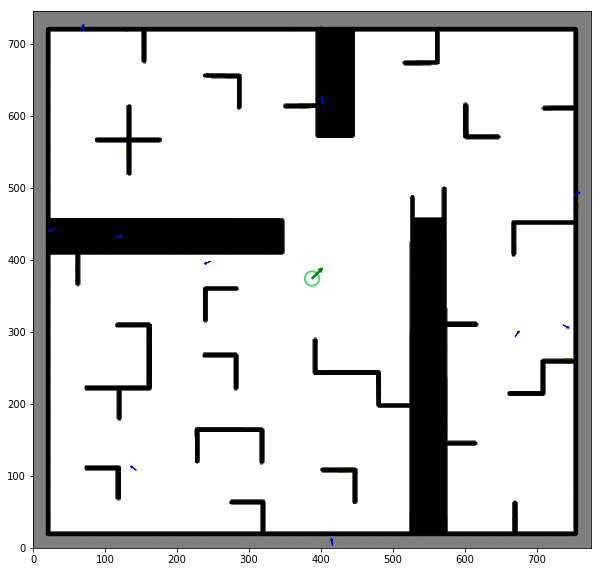

In [3]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [6]:
particulas_exp

[[669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [67.93499380372484, 717.7332140206606, 1.3389667203198696],
 [246.8531896301775, 397.98496735364, 3.5284618551966256],
 [403.19495954180934, 616.9270784709363, 1.8013145625798632],
 [124.89922766927015, 433.6848538179479, 3.3131152621279076],
 [751.4274854571936, 488.5899126918314, 0.575280820754362],
 [143.3542648101137, 107.64393996747395, 2.502494750678089],
 [30.833970304367657, 443.4447474865683, 3.509944715897211],
 [735.7097718782248, 309.65369380441865, -0.46764227265374014],
 [415.82107993376684, 3.407651038571487, 1.712571373973681]]

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.8, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [10]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [11]:
valores_novas_particulas

[[415.82107993376684, 3.407651038571487, 1.712571373973681],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [669.4296077319899, 293.22650848593025, 0.9447992068299174],
 [124.89922766927015, 433.6848538179479, 3.3131152621279076]]

![](animated.gif)